#1. 케라스에 익숙해지기

앞으로 여러분이 딥 러닝 챗봇을 만들기 위해서는 케라스에 익숙해지는 과정을 거쳐야 합니다.

##1-1. 임포트

필요한 패키지를 임포트하는 단계입니다.

In [ ]:
from tensorflow.keras.layers     import Densetagged_sentences = nltk.corpus.treebank.tagged_sents() # 토큰화에 품사 태깅이 된 데이터 받아오기
print("품사 태깅이 된 문장 개수: ", len(tagged_sentences)) # 문장 샘플의 개수 출력
from tensorflow.keras.models     import Sequential
from tensorflow.keras.callbacks  import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

임포트 할 때 이렇게 두 가지 유형이 있을 수 있겠습니다.  
1. 가장 상위의 tf만을 임포트했다면 사용 시에는 하위의 keras.layers.Dense를 순서대로 적어주어야 합니다.

In [ ]:
import tensorflow as tf

tf.keras.layers.Dense(10)

2. 하지만 임포트 시에 가장 하위의 Dense를 제외하고 keras.layers까지 임포트했다면 사용할 때는 Dense만 사용하면 됩니다.

In [ ]:
from tensorflow.keras.layers import Dense

Dense(10)

##1-2. 딥 러닝의 실행순서 우선 훑어보기

1. 전처리: 학습에 필요한 데이터 전처리를 수행합니다.  
2. 모델링(model): 모델을 정의합니다.  
3. 컴파일(compile): 모델을 생성합니다.  
4. 학습 (fit): 모델을 학습시킵니다.

아래는 실제 전처리 - 모델링 - 컴파일 - 학습으로 이어지는 코드를 보여줍니다.

In [ ]:
# 필요한 패키지 import
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# 데이터 전처리
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([5.0, 6.0, 7.0, 8.0, 9.0, 10.0], dtype=float)

# 모델의 정의 (modeling)
model = Sequential([
    Dense(1),
])

# 모델의 생성 (compile)
model.compile(optimizer='sgd', loss='mse')

# 학습 (fit)
model.fit(xs, ys, epochs=1200, verbose=0)

# 검증
# 16.000046
model.predict([10.0])

array([[16.000046]], dtype=float32)

##1-3. 기본 모델 구현 이해하기 (차근차근 처음부터)

###1-3-1. 신경망 모델 정의하기(Dense)

tensorflow 2.0은 keras의 Sequential 방식과 동일하게 블록쌓기 방식으로 매우 쉽게 모델링을 할 수 있습니다.  

Dense Layer는 가장 기본적인 신경망 층이라고 이해하시면 됩니다.  

Dense == Fully Connected Layer 라고도 불리웁니다.

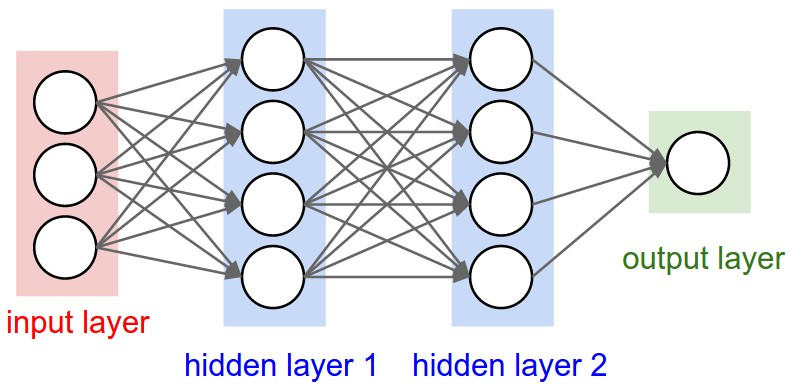

In [ ]:
from IPython.display import Image

Image('https://cs231n.github.io/assets/nn1/neural_net2.jpeg')

In [ ]:
model = Sequential([
    Dense(1),
])

###1-3-2. 적절한 optimizer와 loss 선정하기

우리는 적절한 회귀 값을 예측하는 모델을 만들어야 합니다.

regression(회귀) 예측을 위해서는 loss=mse를 선택합니다.

optimizer는 여러가지를 활용할 수는 있지만, 단순 회귀에는 sgd가 적당합니다.

###1-3-3. compile

선정한 optimizer와 loss를 지정해주고 compile 합니다.

In [ ]:
model.compile(optimizer='sgd', loss='mse')

###1-3-4. fit

이제, 모델에 학습을 진행해야합니다. fit() 메소드를 활용하여 학습을 진행합니다.

학습시, feature, label 값 지정 그리고 epochs을 지정합니다.

In [ ]:
model.fit(xs, ys, epochs=1200, verbose=0)

###1-3-5. predict

In [ ]:
# output
# 16.000046
model.predict([10.0])

array([[16.000046]], dtype=float32)

복습해봅시다.  

1. 신경망을 정의하고(Dense)  
2. optimzer와 loss를 선정 후에  
3. compile을 하고  
4. fit. 즉, 학습을 하여  
5. predict 예측합니다.  

앞으로 챗봇을 만들기 위해서는 방금 본 Dense 1개보다 더 복잡한 신경망인 CNN과 RNN을 사용할 것입니다.  
그 외 2~5 과정은 크게 다르지 않습니다.

#2. 구현 방식 Sequential API Vs. Functioanl API

케라스의 모델 구현 방식은 크게 두 가지가 있습니다.  
Sequential API는 간단한 모델을 만들 수 있습니다.  
Functional API는 Sequential API가 만들 수 있는 모델 + 더 복잡한 모델을 만들 수 있습니다.

동일한 모델을 Sequential API와 Functional API로 만들어봅시다.

##2-1. Sequential API

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

##2-2. Functional API

Functional API에서는 Input()부터 정의해주어야 합니다.

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 입력
inputs = Input(shape=(10,))
hidden1 = Dense(64, activation='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)

# 출력
output = Dense(1, activation='sigmoid')(hidden2)

# 입력과 출력 정의
model = Model(inputs=inputs, outputs=output)

위의 두 모델은 동일한 모델입니다.

#3. 1D CNN으로 네이버 쇼핑 리뷰 분류하기

1D CNN에 대한 모델 이론은 파워포인트를 통해 이해합니다.

In [ ]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 8.7MB/s 
     |████████████████████████████████| 460kB 46.5MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-03-05 15:29:02--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c3:9b0a, 2406:da00:ff00::22c0:3470, ...
Con

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x7f279a366750>)

In [ ]:
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])
print('전체 리뷰 개수 :',len(total_data)) # 전체 리뷰 개수 출력

전체 리뷰 개수 : 200000


In [ ]:
total_data[:5]

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [ ]:
total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)
total_data[:5]

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


In [ ]:
total_data['ratings'].nunique(), total_data['reviews'].nunique(), total_data['label'].nunique()

(4, 199908, 2)

In [ ]:
total_data.drop_duplicates(subset=['reviews'], inplace=True) # reviews 열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 :',len(total_data))

총 샘플의 수 : 199908


In [ ]:
print(total_data.isnull().values.any())

False


In [ ]:
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 149931
테스트용 리뷰의 개수 : 49977


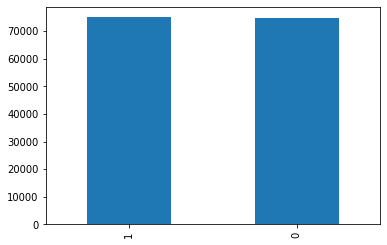

In [ ]:
train_data['label'].value_counts().plot(kind = 'bar')

In [ ]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  74918
1      1  75013


In [ ]:
# 한글과 공백을 제외하고 모두 제거
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['reviews'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

ratings    0
reviews    0
label      0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
test_data.drop_duplicates(subset = ['reviews'], inplace=True) # 중복 제거
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['reviews'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 49977


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [ ]:
mecab = Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는 게 나을 뻔'))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '뻔']


In [ ]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [ ]:
train_data['tokenized'] = train_data['reviews'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
test_data['tokenized'] = test_data['reviews'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 39997
등장 빈도가 1번 이하인 희귀 단어의 수: 18212
단어 집합에서 희귀 단어의 비율: 45.53341500612546
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.7935245745567578


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 21787


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[67, 2060, 299, 14260, 263, 73, 6, 236, 168, 137, 805, 2951, 625, 2, 77, 62, 207, 40, 1343, 155, 3, 6], [482, 409, 52, 8530, 2561, 2517, 339, 2918, 250, 2357, 38, 473, 2], [46, 24, 825, 105, 35, 2372, 160, 7, 10, 8061, 4, 1319, 29, 140, 322, 41, 59, 160, 140, 7, 1916, 2, 113, 162, 1379, 323, 119, 136]]


In [ ]:
print(X_test[:3])

[[14, 704, 767, 116, 186, 252, 12], [339, 3904, 62, 3816, 1651], [11, 69, 2, 49, 164, 3, 27, 15, 6, 513, 289, 17, 92, 110, 564, 59, 7, 2]]


리뷰의 최대 길이 : 85
리뷰의 평균 길이 : 15.307554808545264


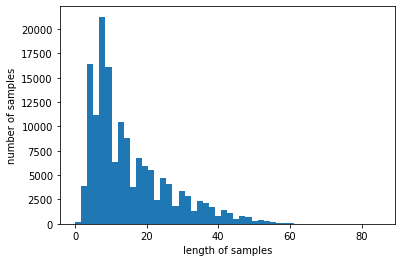

In [ ]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 80
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 80 이하인 샘플의 비율: 99.99933302652553


In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
embedding_dim = 128
dropout_prob = (0.5, 0.8)
num_filters = 128

In [ ]:
model_input = Input(shape = (max_len,))
z = Embedding(vocab_size, embedding_dim, input_length = max_len, name="embedding")(model_input)
z = Dropout(dropout_prob[0])(z)

In [ ]:
conv_blocks = []

for sz in [3, 4, 5]:
    conv = Conv1D(filters = num_filters,
                         kernel_size = sz,
                         padding = "valid",
                         activation = "relu",
                         strides = 1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv = Flatten()(conv)
    conv_blocks.append(conv)

In [ ]:
z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(dropout_prob[1])(z)
z = Dense(128, activation="relu")(z)
model_output = Dense(1, activation="sigmoid")(z)

model = Model(model_input, model_output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('CNN_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.fit(X_train, y_train, batch_size = 64, epochs=10, validation_split=0.2, verbose=2, callbacks=[es, mc])

Epoch 1/10
1875/1875 - 55s - loss: 0.3175 - acc: 0.8691 - val_loss: 0.2366 - val_acc: 0.9137

Epoch 00001: val_acc improved from -inf to 0.91370, saving model to CNN_model.h5
Epoch 2/10
1875/1875 - 37s - loss: 0.2388 - acc: 0.9134 - val_loss: 0.2310 - val_acc: 0.9165

Epoch 00002: val_acc improved from 0.91370 to 0.91653, saving model to CNN_model.h5
Epoch 3/10
1875/1875 - 37s - loss: 0.2145 - acc: 0.9228 - val_loss: 0.2336 - val_acc: 0.9138

Epoch 00003: val_acc did not improve from 0.91653
Epoch 4/10
1875/1875 - 35s - loss: 0.1971 - acc: 0.9287 - val_loss: 0.2306 - val_acc: 0.9145

Epoch 00004: val_acc did not improve from 0.91653
Epoch 5/10
1875/1875 - 35s - loss: 0.1843 - acc: 0.9330 - val_loss: 0.2347 - val_acc: 0.9154

Epoch 00005: val_acc did not improve from 0.91653
Epoch 6/10
1875/1875 - 35s - loss: 0.1734 - acc: 0.9372 - val_loss: 0.2400 - val_acc: 0.9134

Epoch 00006: val_acc did not improve from 0.91653
Epoch 7/10
1875/1875 - 35s - loss: 0.1647 - acc: 0.9404 - val_loss: 0.2

In [ ]:
loaded_model = load_model('CNN_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1562/1562 [==============================] - 5s 3ms/step - loss: 0.2363 - acc: 0.9151

 테스트 정확도: 0.9151


In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = mecab.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [ ]:
sentiment_predict('이 상품 좋아요 ㅋㅋㅋ')

72.12% 확률로 긍정 리뷰입니다.



In [ ]:
sentiment_predict('이 상품 개구려 ㅋㅋㅋ')

95.52% 확률로 부정 리뷰입니다.



#4. LSTM으로 의도 분류하기 (이 부분이 핵심!!)

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Wl10TgCuHJDls0uQ1DGYQ-bOflDFN5gh' -O train_intent.csv

--2021-03-06 00:38:29--  https://docs.google.com/uc?export=download&id=1Wl10TgCuHJDls0uQ1DGYQ-bOflDFN5gh
Resolving docs.google.com (docs.google.com)... 108.177.126.113, 108.177.126.100, 108.177.126.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.126.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hin7udd09cu41j3umbt5737i979fgtuj/1614991050000/17609157229046208934/*/1Wl10TgCuHJDls0uQ1DGYQ-bOflDFN5gh?e=download [following]
--2021-03-06 00:38:29--  https://doc-14-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hin7udd09cu41j3umbt5737i979fgtuj/1614991050000/17609157229046208934/*/1Wl10TgCuHJDls0uQ1DGYQ-bOflDFN5gh?e=download
Resolving doc-14-7k-docs.googleusercontent.com (doc-14-7k-docs.googleusercontent.com)... 108.177.127.132, 2a00:1450:4013:c07::84
Connecting to doc-14-7k-docs.googleusercontent.com (doc-14

In [ ]:
!pip install konlpy

In [ ]:
# colab에서 그래프를 그릴 때 한글이 깨지지 않도록 해주는 코드
# 코드 실행 > Colab 상단의 런타임 > 런타임 다시 시작 > 코드 재실행
# 이후에는 matplotlib으로 그리는 그래프에서 한글이 깨지지 않습니다.
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('train_intent.csv')
df.sample(20)

,question,intent
3521,이슈 알려줘 지금,이슈
2453,이제 시간 알려 줘,시간
1140,동두천 물냉면 맛집 추천해줘,맛집
2319,현재 시간 알려줄래,시간
3778,승리 누군지 궁금해요,인물
1176,학교 주변 떡볶이집 추천해줄래요,맛집
1827,행복한 명언 들려줘요,명언
633,핫한 뉴스 알려줄래요,뉴스
1233,대전주변 피자 맛집 어디 있죠,맛집
2678,가사 무슨 뜻이야,위키


In [ ]:
print('샘플 수 :', len(df))

샘플 수 : 3918


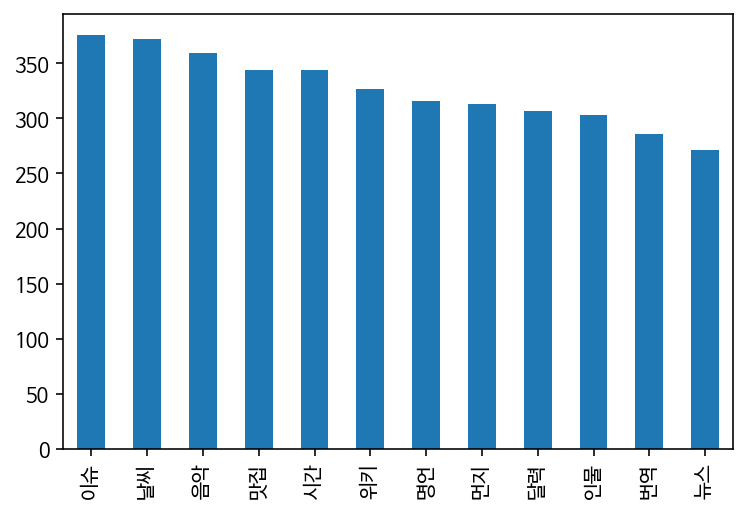

In [ ]:
df['intent'].value_counts().plot(kind = 'bar')

In [ ]:
print(df.groupby('intent').size().reset_index(name = 'count'))

   intent  count
0      날씨    372
1      뉴스    271
2      달력    307
3      맛집    344
4      먼지    313
5      명언    316
6      번역    286
7      시간    344
8      위키    327
9      음악    359
10     이슈    376
11     인물    303


In [ ]:
print(df.isnull().values.any())

False


In [ ]:
okt = Okt()
okt.morphs('주변에 이런 음식 추천해줘요')

['주변', '에', '이런', '음식', '추천', '해줘요']

In [ ]:
X_train = []
for sentence in df.question:
    temp_X = []
    temp_X = okt.morphs(sentence)
    X_train.append(temp_X)

In [ ]:
print(X_train[:3])

[['날씨', '좋아'], ['날씨', '좋니'], ['날씨', '어떠니']]


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)

In [ ]:
print(X_train[:3])

[[9, 237], [9, 136], [9, 140]]


In [ ]:
print(tokenizer.word_index)

{'알려줘': 1, '오늘': 2, '명언': 3, '뭐': 4, '알려줘요': 5, '이': 6, '누구': 7, '지': 8, '날씨': 9, '몇': 10, '무슨': 11, '지금': 12, '주': 13, '해줘': 14, '뭔': 15, '시간': 16, '요': 17, '노래': 18, '알려주라': 19, '추천': 20, '상태': 21, '들려줘': 22, '말': 23, '공기': 24, '이슈': 25, '좀': 26, '이번': 27, '맛집': 28, '요즘': 29, '나': 30, '알려줄래': 31, '주변': 32, '내일': 33, '해줘요': 34, '며칠': 35, '이야': 36, '알려줄래요': 37, '의': 38, '좋은': 39, '에요': 40, '뉴스': 41, '사건': 42, '현재': 43, '이제': 44, '곧': 45, '날짜': 46, '번역': 47, '에게': 48, '인가요': 49, '되는': 50, '에': 51, '뜻': 52, '니': 53, '핫': 54, '거': 55, '미세먼지': 56, '하나': 57, '시야': 58, '어디': 59, '가장': 60, '화제': 61, '중국어': 62, '요일': 63, '있나요': 64, '인지': 65, '힘': 66, '들려줘요': 67, '누군지': 68, '일': 69, '궁금해': 70, '마스크': 71, '어떻게': 72, '우산': 73, '가': 74, '해주세요': 75, '해주라': 76, '멋진': 77, '바람': 78, '결과': 79, '다음': 80, '있니': 81, '알려주세요': 82, '프랑스어': 83, '전': 84, '라': 85, '영어': 86, '최근': 87, '시': 88, '치킨': 89, '음악': 90, '분': 91, '수': 92, '해줄래요': 93, '해줄래': 94, '어때': 95, '만': 96, '비': 97, '음식': 98, '야': 99, '아니': 100, '

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합(Vocabulary)의 크기 :', vocab_size)

단어 집합(Vocabulary)의 크기 : 1606


문장의 최대 길이 : 10
문장의 평균 길이 : 4.077590607452782


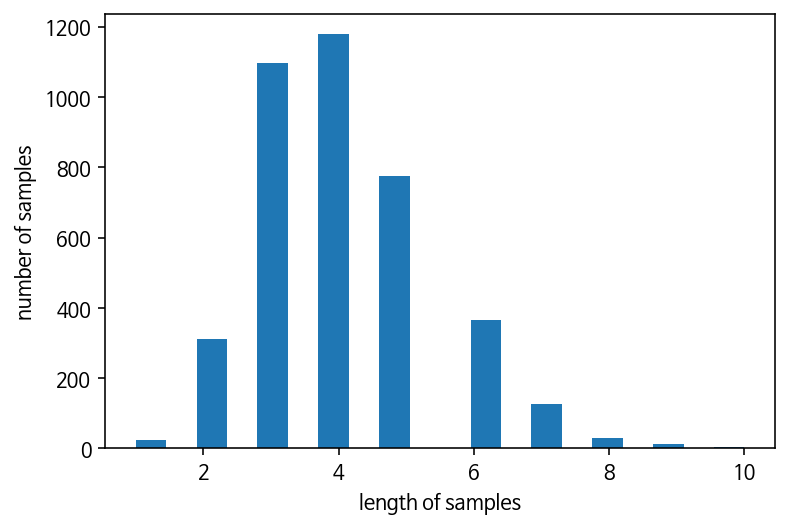

In [ ]:
print('문장의 최대 길이 :',max(len(l) for l in X_train))
print('문장의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=20)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
max_len = 10
X_train = pad_sequences(X_train, maxlen = max_len, padding='post')

In [ ]:
print(X_train[:3])

[[  9 237   0   0   0   0   0   0   0   0]
 [  9 136   0   0   0   0   0   0   0   0]
 [  9 140   0   0   0   0   0   0   0   0]]


In [ ]:
# 레이블 인코딩. 레이블을 정수로 변환
idx_encode = preprocessing.LabelEncoder()
idx_encode.fit(df['intent'])

y_train = idx_encode.transform(df['intent'])

label_idx = dict(zip(list(idx_encode.classes_), idx_encode.transform(list(idx_encode.classes_))))
print(label_idx)

{'날씨': 0, '뉴스': 1, '달력': 2, '맛집': 3, '먼지': 4, '명언': 5, '번역': 6, '시간': 7, '위키': 8, '음악': 9, '이슈': 10, '인물': 11}


In [ ]:
idx_label = {}
for key, value in label_idx.items():
    idx_label[value] = key

In [ ]:
y_train[:3]

array([0, 0, 0])

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 64))
model.add(LSTM(256))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_idx), activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs = 15, batch_size = 64)

Epoch 1/15
62/62 [==============================] - 3s 5ms/step - loss: 2.1680 - acc: 0.1876
Epoch 2/15
62/62 [==============================] - 0s 5ms/step - loss: 0.8659 - acc: 0.6983
Epoch 3/15
62/62 [==============================] - 0s 5ms/step - loss: 0.2901 - acc: 0.9109
Epoch 4/15
62/62 [==============================] - 0s 5ms/step - loss: 0.1461 - acc: 0.9649
Epoch 5/15
62/62 [==============================] - 0s 5ms/step - loss: 0.0955 - acc: 0.9740
Epoch 6/15
62/62 [==============================] - 0s 5ms/step - loss: 0.0699 - acc: 0.9809
Epoch 7/15
62/62 [==============================] - 0s 5ms/step - loss: 0.0867 - acc: 0.9808
Epoch 8/15
62/62 [==============================] - 0s 5ms/step - loss: 0.0361 - acc: 0.9911
Epoch 9/15
62/62 [==============================] - 0s 5ms/step - loss: 0.0207 - acc: 0.9938
Epoch 10/15
62/62 [==============================] - 0s 5ms/step - loss: 0.0277 - acc: 0.9919
Epoch 11/15
62/62 [==============================] - 0s 5ms/step - lo

In [ ]:
def question_processing(sentences):
    inputs = []
    for sentence in sentences:
        sentence = okt.morphs(sentence) 
        encoded = tokenizer.texts_to_sequences([sentence])
        inputs.append(encoded[0])
    padded_inputs = pad_sequences(inputs, maxlen=max_len, padding='post')
    return padded_inputs

In [ ]:
input_sentence = question_processing(['서울 날씨 어때?', 
                                      '나는 전주 날씨 궁금함',
                                      '안중근 의사는 누구야?',
                                      '이순신 장군님은 어떤 사람이니?',
                                      '명동 맛있는 음식점 있니?'
                                     ])

In [ ]:
print(input_sentence)

[[ 147    9   95    0    0    0    0    0    0    0]
 [  30  126  134    9    0    0    0    0    0    0]
 [1593  126    7   99    0    0    0    0    0    0]
 [1547  253  122  332  231    0    0    0    0    0]
 [ 107  101   81    0    0    0    0    0    0    0]]


In [ ]:
prediction = np.argmax(model.predict(input_sentence), axis=1)
print(prediction)

[ 0  9 11 11  3]


In [ ]:
for p in prediction:
    print(idx_label[p])

날씨
음악
인물
인물
맛집


In [ ]:
names = ['안중근', '이순신', '세종대왕', '김광석', '아이유', '에미넴', '이건희', '고아라', '유재석', '한석희', '최민성']
def question_generator(names):
    question = []
    for name in names:
        s1 = name+'는 어떤 분이야?'
        s2 = name+'은 어떤 사람이니?'
        s3 = name+'이란 사람에 대해 궁금해'
        question = question+[s1, s2, s3]
    return question
question = question_generator(names)

In [ ]:
question

['안중근는 어떤 분이야?',
 '안중근은 어떤 사람이니?',
 '안중근이란 사람에 대해 궁금해',
 '이순신는 어떤 분이야?',
 '이순신은 어떤 사람이니?',
 '이순신이란 사람에 대해 궁금해',
 '세종대왕는 어떤 분이야?',
 '세종대왕은 어떤 사람이니?',
 '세종대왕이란 사람에 대해 궁금해',
 '김광석는 어떤 분이야?',
 '김광석은 어떤 사람이니?',
 '김광석이란 사람에 대해 궁금해',
 '아이유는 어떤 분이야?',
 '아이유은 어떤 사람이니?',
 '아이유이란 사람에 대해 궁금해',
 '에미넴는 어떤 분이야?',
 '에미넴은 어떤 사람이니?',
 '에미넴이란 사람에 대해 궁금해',
 '이건희는 어떤 분이야?',
 '이건희은 어떤 사람이니?',
 '이건희이란 사람에 대해 궁금해',
 '고아라는 어떤 분이야?',
 '고아라은 어떤 사람이니?',
 '고아라이란 사람에 대해 궁금해',
 '유재석는 어떤 분이야?',
 '유재석은 어떤 사람이니?',
 '유재석이란 사람에 대해 궁금해',
 '한석희는 어떤 분이야?',
 '한석희은 어떤 사람이니?',
 '한석희이란 사람에 대해 궁금해',
 '최민성는 어떤 분이야?',
 '최민성은 어떤 사람이니?',
 '최민성이란 사람에 대해 궁금해']

In [ ]:
new_data = {'question' : question, 'intent' : ['인물']*len(question)}
add_df = pd.DataFrame(new_data, columns=('question', 'intent'))

In [ ]:
add_df.head(5)

,question,intent
0,안중근는 어떤 분이야?,인물
1,안중근은 어떤 사람이니?,인물
2,안중근이란 사람에 대해 궁금해,인물
3,이순신는 어떤 분이야?,인물
4,이순신은 어떤 사람이니?,인물


In [ ]:
print(len(df), len(add_df))

3918 33


In [ ]:
new_df = pd.concat([df, add_df])
print(len(new_df))

3951


In [ ]:
new_df

,question,intent
0,날씨 좋아,날씨
1,날씨 좋니,날씨
2,날씨 어떠니,날씨
3,영월 날씨 좋니,날씨
4,오늘 비 오나요,날씨
...,...,...
28,한석희은 어떤 사람이니?,인물
29,한석희이란 사람에 대해 궁금해,인물
30,최민성는 어떤 분이야?,인물
31,최민성은 어떤 사람이니?,인물


In [ ]:
X_train = []
for sentence in new_df.question:
    temp_X = []
    temp_X = okt.morphs(sentence)
    X_train.append(temp_X)

In [ ]:
print(X_train[:3])

[['날씨', '좋아'], ['날씨', '좋니'], ['날씨', '어떠니']]


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)

In [ ]:
print(X_train[:3])

[[9, 241], [9, 138], [9, 142]]


In [ ]:
print(tokenizer.word_index)

{'알려줘': 1, '오늘': 2, '명언': 3, '뭐': 4, '알려줘요': 5, '이': 6, '누구': 7, '지': 8, '날씨': 9, '몇': 10, '무슨': 11, '지금': 12, '주': 13, '해줘': 14, '뭔': 15, '시간': 16, '요': 17, '노래': 18, '알려주라': 19, '추천': 20, '상태': 21, '들려줘': 22, '말': 23, '공기': 24, '이슈': 25, '좀': 26, '이번': 27, '맛집': 28, '요즘': 29, '나': 30, '알려줄래': 31, '이야': 32, '주변': 33, '내일': 34, '해줘요': 35, '며칠': 36, '알려줄래요': 37, '의': 38, '좋은': 39, '에요': 40, '뉴스': 41, '사건': 42, '현재': 43, '이제': 44, '곧': 45, '날짜': 46, '번역': 47, '에': 48, '에게': 49, '인가요': 50, '되는': 51, '뜻': 52, '니': 53, '핫': 54, '거': 55, '미세먼지': 56, '하나': 57, '시야': 58, '궁금해': 59, '어디': 60, '가장': 61, '화제': 62, '중국어': 63, '요일': 64, '있나요': 65, '인지': 66, '힘': 67, '들려줘요': 68, '누군지': 69, '일': 70, '분': 71, '마스크': 72, '어떻게': 73, '어떤': 74, '우산': 75, '가': 76, '해주세요': 77, '해주라': 78, '멋진': 79, '바람': 80, '결과': 81, '다음': 82, '있니': 83, '알려주세요': 84, '프랑스어': 85, '전': 86, '라': 87, '영어': 88, '최근': 89, '시': 90, '치킨': 91, '음악': 92, '수': 93, '해줄래요': 94, '해줄래': 95, '어때': 96, '만': 97, '비': 98, '는': 99, '음식': 100, '

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합(Vocabulary)의 크기 :', vocab_size)

단어 집합(Vocabulary)의 크기 : 1613


In [ ]:
max_len = 10
X_train = pad_sequences(X_train, maxlen = max_len, padding='post')

In [ ]:
# 레이블 인코딩. 레이블을 정수로 변환
idx_encode = preprocessing.LabelEncoder()
idx_encode.fit(new_df['intent'])

y_train = idx_encode.transform(new_df['intent'])

label_idx = dict(zip(list(idx_encode.classes_), idx_encode.transform(list(idx_encode.classes_))))
print(label_idx)

{'날씨': 0, '뉴스': 1, '달력': 2, '맛집': 3, '먼지': 4, '명언': 5, '번역': 6, '시간': 7, '위키': 8, '음악': 9, '이슈': 10, '인물': 11}


In [ ]:
idx_label = {}
for key, value in label_idx.items():
    idx_label[value] = key

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 64))
model.add(LSTM(256))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_idx), activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs = 15, batch_size = 64)

Epoch 1/15
62/62 [==============================] - 2s 5ms/step - loss: 2.1363 - acc: 0.1966
Epoch 2/15
62/62 [==============================] - 0s 5ms/step - loss: 0.6318 - acc: 0.7797
Epoch 3/15
62/62 [==============================] - 1s 9ms/step - loss: 0.1983 - acc: 0.9467
Epoch 4/15
62/62 [==============================] - 0s 4ms/step - loss: 0.1002 - acc: 0.9698
Epoch 5/15
62/62 [==============================] - 0s 5ms/step - loss: 0.1060 - acc: 0.9677
Epoch 6/15
62/62 [==============================] - 0s 5ms/step - loss: 0.0409 - acc: 0.9903
Epoch 7/15
62/62 [==============================] - 0s 5ms/step - loss: 0.0523 - acc: 0.9870
Epoch 8/15
62/62 [==============================] - 0s 5ms/step - loss: 0.0292 - acc: 0.9920
Epoch 9/15
62/62 [==============================] - 0s 5ms/step - loss: 0.0295 - acc: 0.9924
Epoch 10/15
62/62 [==============================] - 0s 5ms/step - loss: 0.0515 - acc: 0.9888
Epoch 11/15
62/62 [==============================] - 0s 5ms/step - lo

In [ ]:
input_sentence = question_processing(['서울 날씨 어때?', 
                                      '나는 전주 날씨 궁금함',
                                      '안중근 의사는 누구야?',
                                      '이순신 장군님은 어떤 사람이니?',
                                      '명동 맛있는 음식점 있니?'
                                     ])

In [ ]:
input_sentence

array([[150,   9,  96, 149,   0,   0,   0,   0,   0,   0],
       [ 30,  99, 136,   9,   0,   0,   0,   0,   0,   0],
       [434,  99,   7, 101, 149,   0,   0,   0,   0,   0],
       [433, 166,  74, 135, 154, 149,   0,   0,   0,   0],
       [109, 103,  83, 149,   0,   0,   0,   0,   0,   0]], dtype=int32)

In [ ]:
prediction = np.argmax(model.predict(input_sentence), axis=1)
print(prediction)

[ 0  0 11 11  3]


In [ ]:
for p in prediction:
    print(idx_label[p])

날씨
날씨
인물
인물
맛집
